<a href="https://colab.research.google.com/github/JColeman1550/BASEBALL/blob/main/ANALYZING_2021_AL_CENTRAL_PYBASEBALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install pybaseball

In [2]:
import pybaseball as pyb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
year = 2021
white_sox = pyb.schedule_and_record(year,'CHW')
guardians = pyb.schedule_and_record(year, 'CLE')
tigers = pyb.schedule_and_record(year, 'DET')
royals = pyb.schedule_and_record(year, 'KCR')

/usr/local/lib/python3.7/dist-packages/pybaseball/team_results.py:70: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('',1) #not a useful column
/usr/local/lib/python3.7/dist-packages/pybaseball/team_results.py:83: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Streak2',1)


Summary Statistics

Focusing on the mean stats we can see that the first place White Sox had big difference in mean runs compared to the rest of the division. The second place Guardians finished about half a run behind the 1st place Sox. The third place Tigers finsihed third in mean runs while the last place Royals finished last in that category.

One interesting fact is that the hottest streak belonged to the third place Tigers. 



In [4]:
white_sox.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,158.000000,162.000000
mean,4.913580,3.925926,8.901235,1.314815,18496.898734,0.543210
std,3.525233,2.823054,0.642297,0.791823,9983.595926,2.085438
min,0.000000,0.000000,7.000000,1.000000,4176.000000,-5.000000
25%,2.000000,1.250000,9.000000,1.000000,10218.500000,-1.000000
50%,4.000000,3.000000,9.000000,1.000000,16195.500000,1.000000
75%,7.000000,6.000000,9.000000,1.000000,23787.000000,2.000000
max,17.000000,13.000000,11.000000,5.000000,41686.000000,6.000000


In [5]:
guardians.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,157.000000,162.000000
mean,4.425926,4.487654,8.925926,2.111111,15385.477707,-0.135802
std,3.047870,3.180370,0.692063,0.510754,7908.999782,2.213752
min,0.000000,0.000000,7.000000,1.000000,1832.000000,-9.000000
25%,2.000000,2.000000,9.000000,2.000000,9491.000000,-1.000000
50%,4.000000,4.000000,9.000000,2.000000,12551.000000,-1.000000
75%,6.000000,6.750000,9.000000,2.000000,20100.000000,1.000000
max,14.000000,18.000000,11.000000,5.000000,39088.000000,5.000000


In [6]:
tigers.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,160.00000,162.000000
mean,4.302469,4.666667,9.030864,3.561728,14968.93125,-0.185185
std,3.021845,3.293132,0.663352,0.877187,7186.74969,2.338504
min,0.000000,0.000000,7.000000,1.000000,3004.00000,-6.000000
25%,2.000000,2.000000,9.000000,3.000000,8000.00000,-2.000000
50%,4.000000,4.000000,9.000000,3.000000,13800.00000,-1.000000
75%,6.000000,7.000000,9.000000,4.000000,19215.50000,1.000000
max,17.000000,15.000000,11.000000,5.000000,36320.00000,7.000000


In [7]:
royals.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,161.000000,162.000000
mean,4.234568,4.864198,9.012346,3.327160,15263.496894,-0.623457
std,2.926731,3.014471,0.557141,1.183899,7800.668039,2.988623
min,0.000000,0.000000,7.000000,1.000000,3211.000000,-11.000000
25%,2.000000,2.000000,9.000000,3.000000,9259.000000,-2.000000
50%,3.500000,5.000000,9.000000,4.000000,13626.000000,-1.000000
75%,6.000000,7.000000,9.000000,4.000000,20803.000000,1.000000
max,14.000000,15.000000,12.000000,5.000000,36615.000000,6.000000


In [8]:
from numpy.ma.core import cumsum

In [9]:
white_sox['Wins'] = np.where(white_sox['W/L']=='W', 1, (np.where(white_sox['W/L']=='W-wo', 1, 0))).cumsum()
white_sox['Losses'] = np.where(white_sox['W/L']=='L', 1, (np.where(white_sox['W/L']=='L-wo', 1, 0))).cumsum()
white_sox['Win_Percentage'] = white_sox['Wins'] / (white_sox['Wins'] + white_sox['Losses'])

guardians['Wins'] = np.where(guardians['W/L']=='W', 1, (np.where(guardians['W/L']=='W-wo', 1, 0))).cumsum()
guardians['Losses'] = np.where(guardians['W/L']=='L', 1,(np.where (guardians['W/L']=='L-wo', 1, 0))).cumsum()
guardians['Win_Percentage'] = guardians['Wins'] / (guardians['Wins'] + guardians['Losses'])

tigers['Wins']= np.where(tigers['W/L']=='W', 1, (np.where(tigers['W/L']=='W-wo', 1, 0))).cumsum()
tigers['Losses']= np.where(tigers['W/L']=='L', 1, (np.where(tigers['W/L']=='L-wo', 1, 0))).cumsum()
tigers['Win_Percentage']= tigers['Wins'] / (tigers['Wins'] + tigers['Losses'])

royals['Wins'] = np.where(royals['W/L']=='W', 1, (np.where(royals['W/L']=='W-wo', 1, 0))).cumsum()
royals['Losses'] = np.where(royals['W/L']=='L', 1, (np.where(royals['W/L']=='L-wo', 1, 0))).cumsum()
royals['Win_Percentage'] = royals['Wins'] / (royals['Wins'] + royals['Losses'])


Graphing Wins & Win Percentages

Looking at this graph we can see that the division race wasn't much of a contest as the White Sox lead a majority of the way. At about the 50 game mark the Sox began to pull away from the Guardians and never relinquished the lead. The Guardians held second place for most of the season, almost falling into third place around game 120. 


Text(0.5, 1.0, 'AL Central Wins Comparison (2021)')

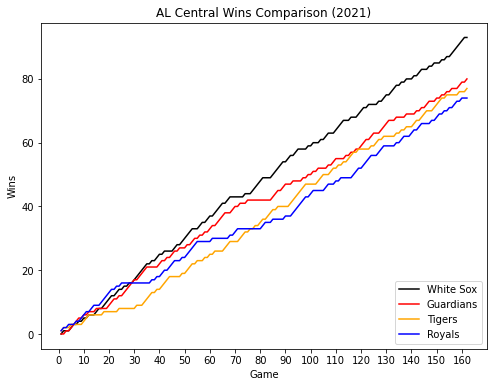

In [10]:
#Graphing Wins and Win %

plt.rcParams["figure.figsize"] = (8,6)

plt.plot(white_sox['Wins'],label='White Sox',c='black')
plt.plot(guardians['Wins'], label='Guardians',c='red')
plt.plot(tigers['Wins'],label='Tigers',c='Orange')
plt.plot(royals['Wins'],label='Royals',c='blue')

plt.xticks(np.arange(0, len(white_sox.index), step=10))
plt.xlabel('Game')
plt.ylabel('Wins')

plt.legend(loc='lower right')

plt.title("AL Central Wins Comparison ({})".format(year))

Text(0.5, 1.0, 'AL Central Win Percentage Comparison (2021)')

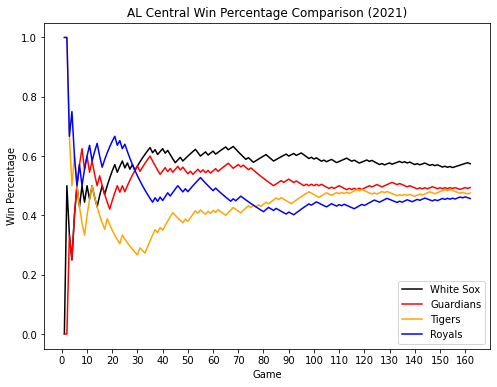

In [11]:
# Graph Win Percentage Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(white_sox['Win_Percentage'], label='White Sox', c='black')
plt.plot(guardians['Win_Percentage'], label='Guardians', c='red')
plt.plot(tigers['Win_Percentage'], label='Tigers', c='orange')
plt.plot(royals['Win_Percentage'], label='Royals', c='blue')


plt.xticks(np.arange(0, len(white_sox.index), step=10))
plt.xlabel('Game')
plt.ylabel('Win Percentage')

plt.legend(loc='lower right')

plt.title("AL Central Win Percentage Comparison ({})".format(year))

In [12]:
# Graphing Games Back

def modify_gb(gb):
    if gb == 'Tied':
        gb = 0.0
    elif 'up' in gb:
        gb = 0.0

    else:
        gb = -float(gb)
    return gb

white_sox['int_GB'] = white_sox['GB'].dropna().apply(modify_gb)
guardians['int_GB'] = guardians['GB'].dropna().apply(modify_gb)
tigers['int_GB'] = tigers['GB'].dropna().apply(modify_gb)
royals['int_GB'] = royals['GB'].dropna().apply(modify_gb)

Graphing Games Back

This graph gives us an even clearer image of how the AL Central played out over the course of 2021.

The Royals fell into last place at game 80 and never recovered. They finished a season high 20 games back at arouind the 90 game mark and finished 18 games back.

At around the 30 game mark the White Sox, Guardians and Royals were all tied for first place. After that both the Guardians and Royals fell while the White Sox held on to 1st for the rest of the season.

To show even further how much the White Sox won by a landslide, the second place Guardians finished 12 games back of first.

Text(0.5, 1.0, 'AL Central Games Back Comparison (2021)')

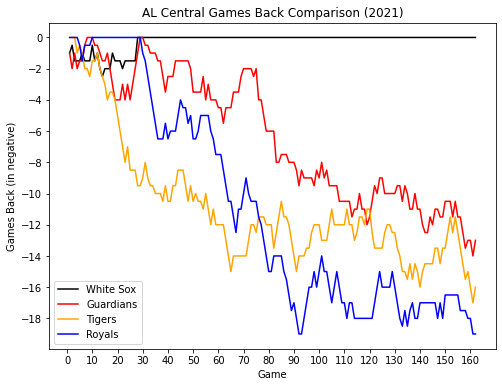

In [13]:
plt.rcParams['figure.figsize']=(8,6)

plt.plot(white_sox['int_GB'], label='White Sox', c='black')
plt.plot(guardians['int_GB'], label='Guardians', c='red')
plt.plot(tigers['int_GB'], label='Tigers', c='orange')
plt.plot(royals['int_GB'], label='Royals', c='blue')

plt.xticks(np.arange(0, len(white_sox.index), step =10))
plt.yticks(np.arange(0, -20, step =-2))
plt.xlabel('Game')
plt.ylabel('Games Back (in negative)')
plt.legend(loc='lower left')
plt.title('AL Central Games Back Comparison ({})'.format(year))

Graphing Total Runs and Runs Allowed

Graphing total runs and runs allowed helps us understand and illustrate factors in each teams rank within the division.

The Royals were this year's last place team and we can see that they finished with the fewest runs scored in the division while allowing the most runs. The The Royals finshed just below the third place Tigers in Runs scored.

The White Sox outpaced the rest of the division from the 30 game mark on. This coincides with them taking reigns of first place and never looking back. They would go on to finish with close to 800 runs scored while allowing around 600 runs.

Runs and runs allowed have the highest correlation between a teams win-loss record. This graph illustrates this with the first place team being first in runs scored, second place being second, the third place team being third, and the last place team scoring the fewest runs. Runs allowed shows the inverse. 


Text(0.5, 1.0, 'AL Central Runs Allowed Comparison (2021)')

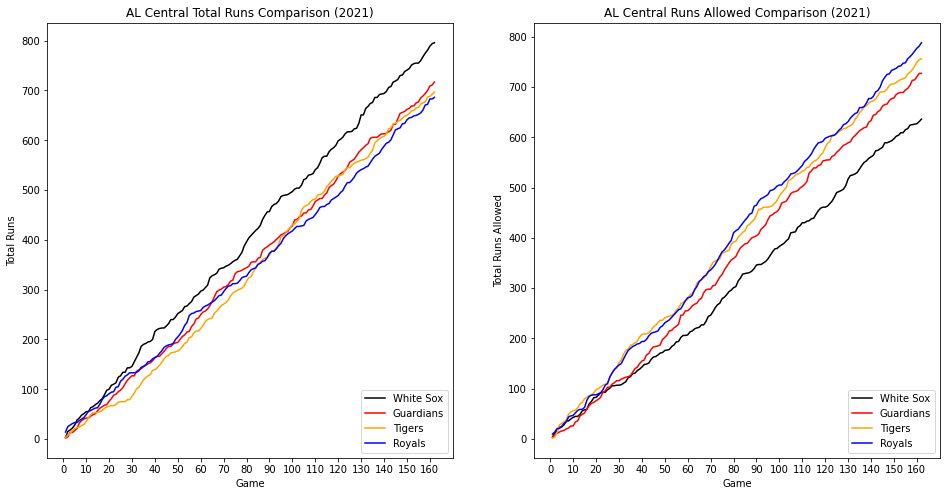

In [14]:
# Graphing Total Runs & Runs Allowed 

white_sox['Total_Runs'] = white_sox['R'].cumsum()
white_sox['Total_RA'] = white_sox['RA'].cumsum()

guardians['Total_Runs'] = guardians['R'].cumsum()
guardians['Total_RA'] = guardians['RA'].cumsum()

tigers['Total_Runs'] = tigers['R'].cumsum()
tigers['Total_RA'] = tigers['RA'].cumsum()

royals['Total_Runs'] = royals['R'].cumsum()
royals['Total_RA'] = royals['RA'].cumsum()


plt.rcParams['figure.figsize']=(16,8)
plt.subplot(1,2,1)
plt.plot(white_sox['Total_Runs'], label='White Sox', c='black')
plt.plot(guardians['Total_Runs'], label='Guardians',c='red')
plt.plot(tigers['Total_Runs'], label='Tigers', c='orange')
plt.plot(royals['Total_Runs'], label='Royals', c='blue')

plt.xticks(np.arange(0, len(white_sox.index), step = 10))
plt.xlabel('Game')
plt.ylabel('Total Runs')
plt.legend(loc='lower right')
plt.title('AL Central Total Runs Comparison ({})'.format(year))

plt.rcParams['figure.figsize']=(16,8)
plt.subplot(1,2,2)
plt.plot(white_sox['Total_RA'],label='White Sox',c='black')
plt.plot(guardians['Total_RA'],label='Guardians',c='red')
plt.plot(tigers['Total_RA'],label='Tigers',c='orange')
plt.plot(royals['Total_RA'],label='Royals', c='blue')

plt.xticks(np.arange(0, len(white_sox.index),step=10))
plt.xlabel('Game')
plt.ylabel('Total Runs Allowed')
plt.legend(loc='lower right')
plt.title('AL Central Runs Allowed Comparison ({})'.format(year))

